<a href="https://colab.research.google.com/github/DanishFaraaz/Deep-Learning-Projects/blob/main/16_Keras_Rank_1_and_Rank_5_Accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np

model = MobileNetV2(weights='imagenet')
model.summary()

14536120/14536120 [==============================] - 1s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
              

In [2]:
!gdown --id 1VyfggIFN2H6cubfh3_yUdicNicZa9sAp
!unzip images.zip
!rm -rf ./images/class1/.DS_Store

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1VyfggIFN2H6cubfh3_yUdicNicZa9sAp
To: /content/images.zip
100% 1.46M/1.46M [00:00<00:00, 136MB/s]
Archive:  images.zip
   creating: images/
  inflating: images/.DS_Store        
   creating: images/class1/
  inflating: images/class1/.DS_Store  
  inflating: images/class1/1539714414867.jpg  
  inflating: images/class1/81z6x3SZEpL._AC_SL1500_.jpg  
  inflating: images/class1/Basketball_(Ball).jpg  
  inflating: images/class1/German_Shepherd_-_DSC_0346_(10096362833).jpg  
  inflating: images/class1/christmas-stockings-3006869_1280.jpg  
  inflating: images/class1/download.jpg  
  inflating: images/class1/limo-safety-ftr.jpg  
  inflating: images/class1/long-haired-collie-5766447_1280.jpg  
  inflating: images/class1/spiderweb

In [4]:
import cv2
from os import listdir
from os.path import isfile, join

mypath = "./images/class1/"
file_names = [f for f in listdir(mypath) if isfile(join(mypath, f))]
file_names

['long-haired-collie-5766447_1280.jpg',
 'limo-safety-ftr.jpg',
 'spiderweb_1050x700.jpg',
 '1539714414867.jpg',
 'German_Shepherd_-_DSC_0346_(10096362833).jpg',
 'christmas-stockings-3006869_1280.jpg',
 'download.jpg',
 '81z6x3SZEpL._AC_SL1500_.jpg',
 'Basketball_(Ball).jpg']

1/1 [==============================] - 0s 21ms/step


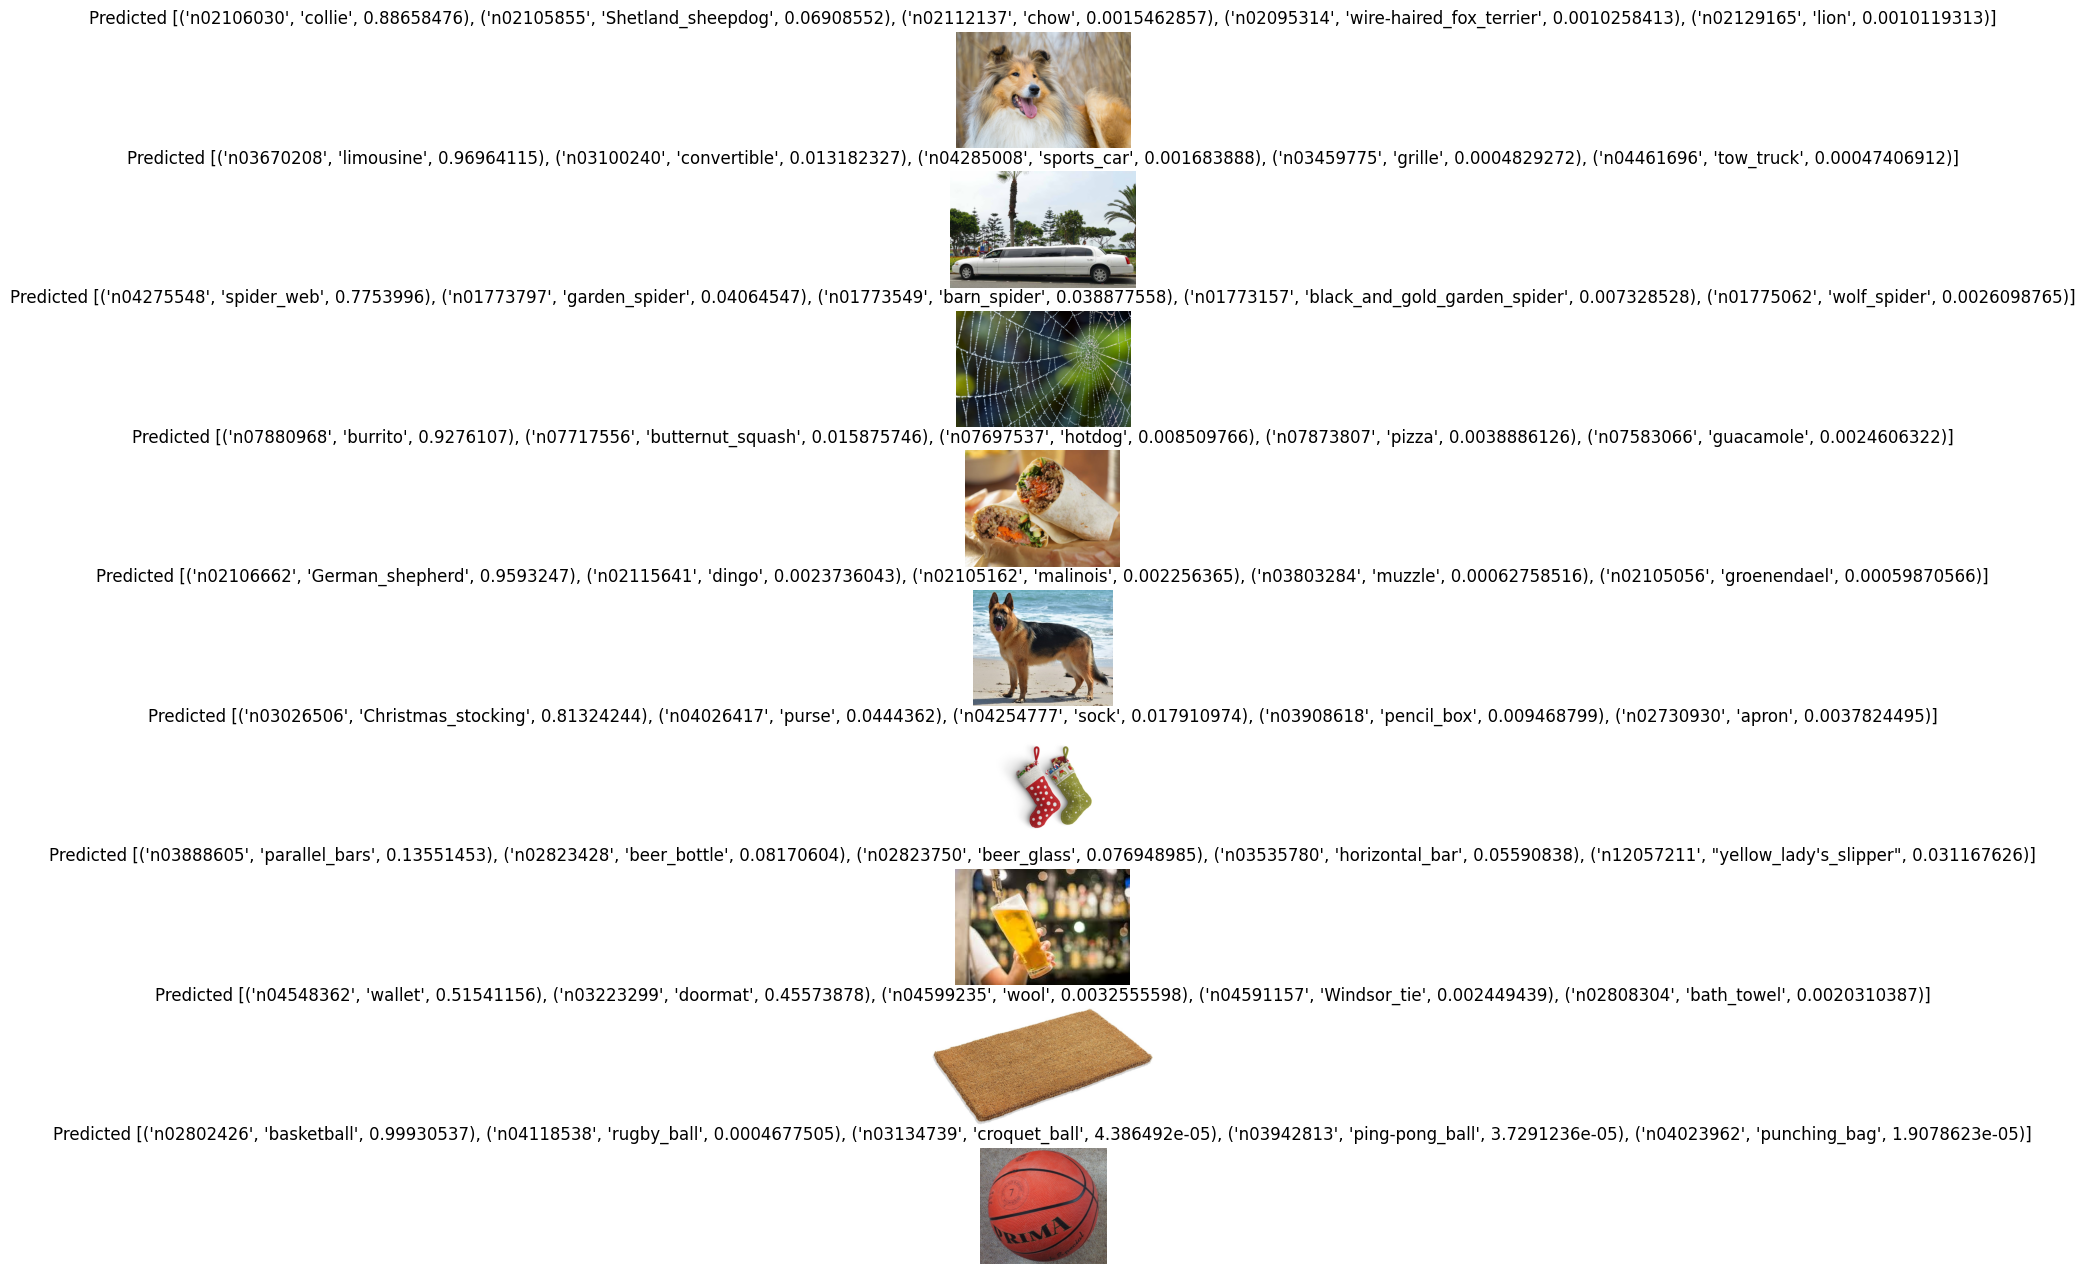

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,16))
all_top_classes = []

for (i, file) in enumerate(file_names):

  img = image.load_img(mypath+file, target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  img2 = cv2.imread(mypath+file)

  preds = model.predict(x)
  predictions = decode_predictions(preds, top=5)[0]
  all_top_classes.append([x[1] for x in predictions])

  sub = fig.add_subplot(len(file_names), 1, i+1)
  sub.set_title(f'Predicted {str(predictions)}')
  plt.axis('off')
  plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()

In [7]:
predictions

[('n02802426', 'basketball', 0.99930537),
 ('n04118538', 'rugby_ball', 0.0004677505),
 ('n03134739', 'croquet_ball', 4.386492e-05),
 ('n03942813', 'ping-pong_ball', 3.7291236e-05),
 ('n04023962', 'punching_bag', 1.9078623e-05)]

In [8]:
all_top_classes

[['collie', 'Shetland_sheepdog', 'chow', 'wire-haired_fox_terrier', 'lion'],
 ['limousine', 'convertible', 'sports_car', 'grille', 'tow_truck'],
 ['spider_web',
  'garden_spider',
  'barn_spider',
  'black_and_gold_garden_spider',
  'wolf_spider'],
 ['burrito', 'butternut_squash', 'hotdog', 'pizza', 'guacamole'],
 ['German_shepherd', 'dingo', 'malinois', 'muzzle', 'groenendael'],
 ['Christmas_stocking', 'purse', 'sock', 'pencil_box', 'apron'],
 ['parallel_bars',
  'beer_bottle',
  'beer_glass',
  'horizontal_bar',
  "yellow_lady's_slipper"],
 ['wallet', 'doormat', 'wool', 'Windsor_tie', 'bath_towel'],
 ['basketball',
  'rugby_ball',
  'croquet_ball',
  'ping-pong_ball',
  'punching_bag']]

In [15]:
ground_truth = ['basketball',
                'German_shepherd',
                'limousine, limo',
                'spider_web',
                'burrtio',
                'beer_glass',
                'doormat',
                'Christmas_stocking',
                'collie']

In [13]:
def getScore(all_top_classes, ground_truth, N):
  in_labels = 0
  for (i, labels) in enumerate(all_top_classes):
    if ground_truth[i] in labels[:N]:
      in_labels += 1
  return f'Rank-{N} Accuracy = {in_labels/len(all_top_classes)*100:.2f}%'

In [14]:
getScore(all_top_classes, ground_truth, 5)

'Rank-5 Accuracy = 0.00%'

In [16]:
getScore(all_top_classes, ground_truth, 1)

'Rank-1 Accuracy = 0.00%'